In [ ]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems")
using GenLinAlgProblems, LinearAlgebra
;

<div style="height:2cm;">
<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Summary 01: Matrix Multiplication</strong>
</div></div>

# 1. Definition of Matrix Multiplication

## 1.1. The Dot Product

The **dot product** of two vectors $u$ and $v \in \mathbb{F}^K$ is defined by

$\qquad
u = \begin{pmatrix} u_1\\ u_2 \\ \dots \\ u_K \end{pmatrix},\quad
v = \begin{pmatrix} v_1\\ v_2 \\ \dots \\ v_K \end{pmatrix}, \quad
\text{ then } \quad  \color{brown}{ u \cdot v = u_1 v_1 + u_2 v_2 + \dots u_K v_K }
$

Using summation notation, this is

$\qquad
u \cdot v = \sum_{k=1}^K {u_k v_k}.
$

**Remark:** Given two vectors, the dot product produces a **scalar**.

In [2]:
u = [1 2 3]; v = [5 -1 2]
u_dot_v = dot( u, v )

println(" Given vectors u=$u, v= $v" )
println(".  then u⋅v = $u_dot_v")

 Given vectors u=[1 2 3], v= [5 -1 2]
.  then u⋅v = 9


## 1.2 Generalization: The Matrix Product

The **matrix product** systematically computes all dot products between a set of vectors $a_1, a_2, \dots a_M$ and $b_1, b_2, \dots b_N$: the computation can be listed in a table (spreadsheet format):

<div style="float:left;margin-left:2cm;">

$ $   | $\color{red}{b_1}  $  | $ \color{red}{b_2} $ | $\dots $ |
------|-----------------       |------------------    | --- |
$\color{red}{a_1}$ | $a_1 \cdot b_1$        | $a_1 \cdot b_2$      | $\dots $ |
$\color{red}{a_2}$ | $a_2 \cdot b_1$        | $a_2 \cdot b_2$      | $\dots $ |
$\dots $ |  $\dots $ |  $\dots $ |  $\dots $ |
</div>

To lay this out in a spreadsheet, the $a_i$ vectors are entered as horizontal rows,
while the $b_i$ vectors are entered as vertical columns.

Thus the computations for

$\qquad a_1 = \begin{pmatrix} 1 \\ 2 \end{pmatrix}, a_2 = \begin{pmatrix} 3 \\ 4 \end{pmatrix}$

and

$\qquad b_1 = \begin{pmatrix} 5 \\ 1 \end{pmatrix}, b_2 = \begin{pmatrix} 3 \\ -2 \end{pmatrix}, b_3 = \begin{pmatrix} -1 \\ 0 \end{pmatrix}$

look as follows:

<div style="float:left;margin-left:2cm;">

$ $   | $ $   | $ $ | $ $ | $ $ |
------|------|-----------------      |------------------    | --- |
$ $ | $ $   | $\color{red}{\;5}  $  | $ \color{red}{\;\;3} $ | $\color{red}{-1}$ |
$ $ | $ $   | $\color{red}{\;1}  $  | $ \color{red}{\;-2} $ | $\color{red}{\;0}$ |
$\color{red}{1}$ | $\color{red}{2}$ | $\;7$    | $\;-1$      | $\;\;1$ |
$\color{red}{3}$ | $\color{red}{4}$ | $19$     | $\;\;1$     | $-3$ |
</div>

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Dot products dot( a_i, b_j )</p>\n</div>")

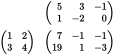

The dot product dot( [1 2], [5  1]) = 7
The dot product dot( [3 4], [3 -2]) = 1


In [3]:
A = [ 1 2;  3 4 ]        # a vectors are entered as successive rows
B = [ 5  3 -1; 1 -2  0 ] # b vectors are entered as successive columns
# The dot products are computed by
C = A * B
pr( "Dot products dot( a_i, b_j )", sz=15, height=15)
h,_=nM.ge( [[:none, B], [A, C]])
display(h)
println("The dot product dot( [1 2], [5  1]) = 7")
println("The dot product dot( [3 4], [3 -2]) = 1")

# 2. Special Cases

## 2.1 Inner and outer products

### 2.1.1 Inner Product: Row Vector Times Column Vector

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:10px;color:black;font-size:15pt;\">Row Vector times Column Vector is a 1x1 size matrix</p>\n</div>")

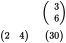

In [4]:
a = reshape([2 4], (1,2));  b=reshape([3 6],(2,1)); c = a*b
pr("Row Vector times Column Vector is a 1x1 size matrix",sz=15,height=10)
h,_=nM.ge([[:none, b], [a, c]])
h

### 2.1.2 Outer Product: Column Vector times Row Vector

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:10px;color:black;font-size:15pt;\">Column Vector times Row Vector</p>\n</div>")

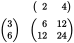

In [5]:
pr("Column Vector times Row Vector",sz=15,height=10)
c = b*a
h,_=nM.ge([[:none,a], [b, c]])
h

## 2.2 Matrix Times Column Vector

Consider

$\qquad
A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ \end{pmatrix}, \quad
x = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}
$

and the matrix product $A x$.

* If we look at the product of each of the rows of $A$ with the column $x$,
we see they produce inner products<p style="color:coral;font-size:15pt"> the <b>row view:</b></p>

$\qquad\begin{align} 1 x_1 + 2 x_2 + 3 x_3 & \text{  and}\\
  4 x_1 + 5 x_2 + 6 x_3 & \end{align}
$

* If we look at the product of each of the columns of $A$ with each row in $x$, we see they produce outer products:
<p style="color:coral;font-size:15pt;">the <b>column view</b>:</p>

$\qquad
x_1 \begin{pmatrix} 1\\4\end{pmatrix} +
x_2 \begin{pmatrix} 2\\5\end{pmatrix} +
x_3 \begin{pmatrix} 3\\6\end{pmatrix}
$

An easy way to see this is to realize the sum in the definition of the matrix product can be broken up:

$\qquad
c_{i j} = \sum_{k=1}^K{a_{i k} b_{k j}} = a_{i 1} b_{1 j} + \sum_{k=2}^K{a_{i k} b_{k j}}
$

# 3. Submatrices

The general rule: we can break up matrices in a product into submatrices. Consider

$\qquad \begin{array}{c} & (B) \\ (A) & (C) \end{array}$

## 3.1 We can partition the $A$ and $C$ matrices horizontally

$\qquad \begin{array}{cc}
                                                     & \left(\begin{array}{c} B \end{array}\right)\\
\left(\begin{array}{c} A_1 \\ \hline A_2\end{array}\right)  & \left(\begin{array}{c} C_1 \\ \hline C_2\end{array}\right)
\end{array}$

$\qquad$ where $C_1 = A_1 B$ and $C_2 = A_2 B$.

## 3.2 We can partition the $B$ and $C$ matrices vertically

$\qquad \begin{array}{cc}
                                                     & \left(\begin{array}{c|c} B_1 & B_2  \end{array}\right)\\
\left(\begin{array}{c} A \end{array}\right)  & \left(\begin{array}{c|c} C_1 & C_2\end{array}\right)
\end{array}$

$\qquad$ where $C_1 = A B_1$ and $C_2 = A B_2$.

## 3.3 We can partition the $A$ matrix vertically, and the $B$ matrix horizontally
**Remark:** keep the sizes consistent

$\qquad \begin{array}{cc}
                                                      & \left(\begin{array}{c} B_1 \\ B_2 \end{array}\right)\\
\left(\begin{array}{c|c} A_1 & A_2 \end{array}\right) & \left(\begin{array}{c} C \end{array}\right)
\end{array}$

$\qquad$ where $C = A_1 B_1 + A_2 B_2$.

## 3.4 We can partition further, horizontally and vertically...

As an example, consider

$\qquad
A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}, \quad
B = \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix}
$

If we subdivide the first matrix into columns, we see the sum of outer products $C = A B$

$\qquad
C = \begin{pmatrix} 1 \\
                    3 \end{pmatrix}
\begin{pmatrix}  5&  6\\
                 \end{pmatrix} +
 \begin{pmatrix} 2 \\
                    4 \end{pmatrix}
\begin{pmatrix}  7&  8\\
                 \end{pmatrix}
$

If we subdivide the first matrix into columns and rows, we see the the linear combinations of the rows of the second matrix

$\qquad
C = \begin{pmatrix}C_1 \\C_2 \end{pmatrix}$
where

$\qquad
\begin{align}
C_1 =& \begin{pmatrix} 1 \end{pmatrix} \begin{pmatrix}  5&  6\\ \end{pmatrix} +
      \begin{pmatrix} 2 \end{pmatrix} \begin{pmatrix}  7&  8\\ \end{pmatrix} & \text{ i.e., } R_1 \leftarrow 1 R_1 + 2 R_2 \\
C_2 =& \begin{pmatrix} 3 \end{pmatrix} \begin{pmatrix}  5&  6\\ \end{pmatrix} +
      \begin{pmatrix} 4 \end{pmatrix} \begin{pmatrix}  7&  8\\ \end{pmatrix} &  \text{ i.e., } R_2 \leftarrow 3 R_1 + 4 R_2 \\
\end{align}
$

# 4. Notation convention

Unless otherwise stated, we will automatically convert a vector $u$ to a **column vector**.
* $u^t \quad$ is the corresponding row vector
* $u^t v \quad$ is the inner product of the vectors $u$ and $v$
* $u \ v^t \quad$ is the outer product of the vectors $u$ and $v$

# 5. Key Take Away 

<div style="background-color:#F2F5A9">

* Systems of equations can be seen in **row view** and in **column view**
* Matrix multiplication shows both. Using the augmented form, we write $A x = b <=> [A \mid b]$
* We will show Matrix Multiplication
    * algebraically: $\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\quad A x = b \Rightarrow E A x = E b$
    * in a computational layout:
    $$\begin{matrix}   &  [\;  \;\; A | \;\; b] \\
                    [\ E\ ] &\ [\ E A \mid E b ]\end{matrix}
    $$

The computational layout will prove extremely useful:<br>
it captures both the column and row views and their evolution as we apply matrices to the original equations.
</div>

<div style="background-color:#F2F5A9">
The computational layout can easily be stacked:

$\qquad\begin{matrix}          & [ & A         &\mid &  b        & ] \\
                [\ E_1\ ] & [ & E_1 A     &\mid & E_1 b     & ] \\
                [\ E_2\ ] & [ & E_2 E_1 A &\mid & E_2 E_1 b & ]
                \end{matrix}
$
</div>

<div style="background-color:#F2F5A9">
Augmenting by $I$ captures the products of elementary operation matrices applied:

$\qquad\begin{matrix}          & [ & A         &\mid & I       & ] \\
                [\ E_1\ ] & [ & E_1 A     &\mid & E_1     & ] \\
                [\ E_2\ ] & [ & E_2 E_1 A &\mid & E_2 E_1 & ] \\
                \dots     & [ & \dots     &\mid & \dots   & ] \\
                \dots     & [ & U         &\mid & E       & ] \\
                \end{matrix}
$

<p style="margin-top: 1cm;">
shows that $\quad U = E\ A$
</p>
</div>